# Boston House Price

## Determinar o valor de um imóvel nos bairros de Boston, dada 13 features e 1 label

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ml_libs import linear_regression_gd as md
from ml_libs import metrics
from ml_libs import transf
import seaborn as sns
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from importlib import reload
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
reload(md)
reload(metrics)
reload(transf)

<module 'ml_libs.transf' from '/home/aands/Documentos/ML/ml_libs/transf.py'>

## Preparando os dados

In [3]:
header = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data = pd.read_csv('housing.data', header=None, delim_whitespace=True)
data.columns = header
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
# label
y = prices
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [7]:
# features
X = features
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [8]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


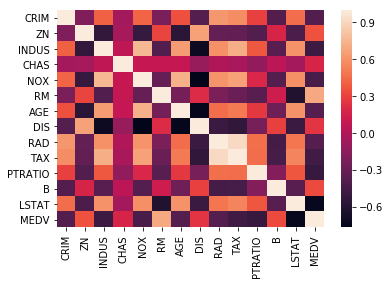

In [10]:
sns.heatmap(data.corr())
sns.set_style("whitegrid")
plt.show()

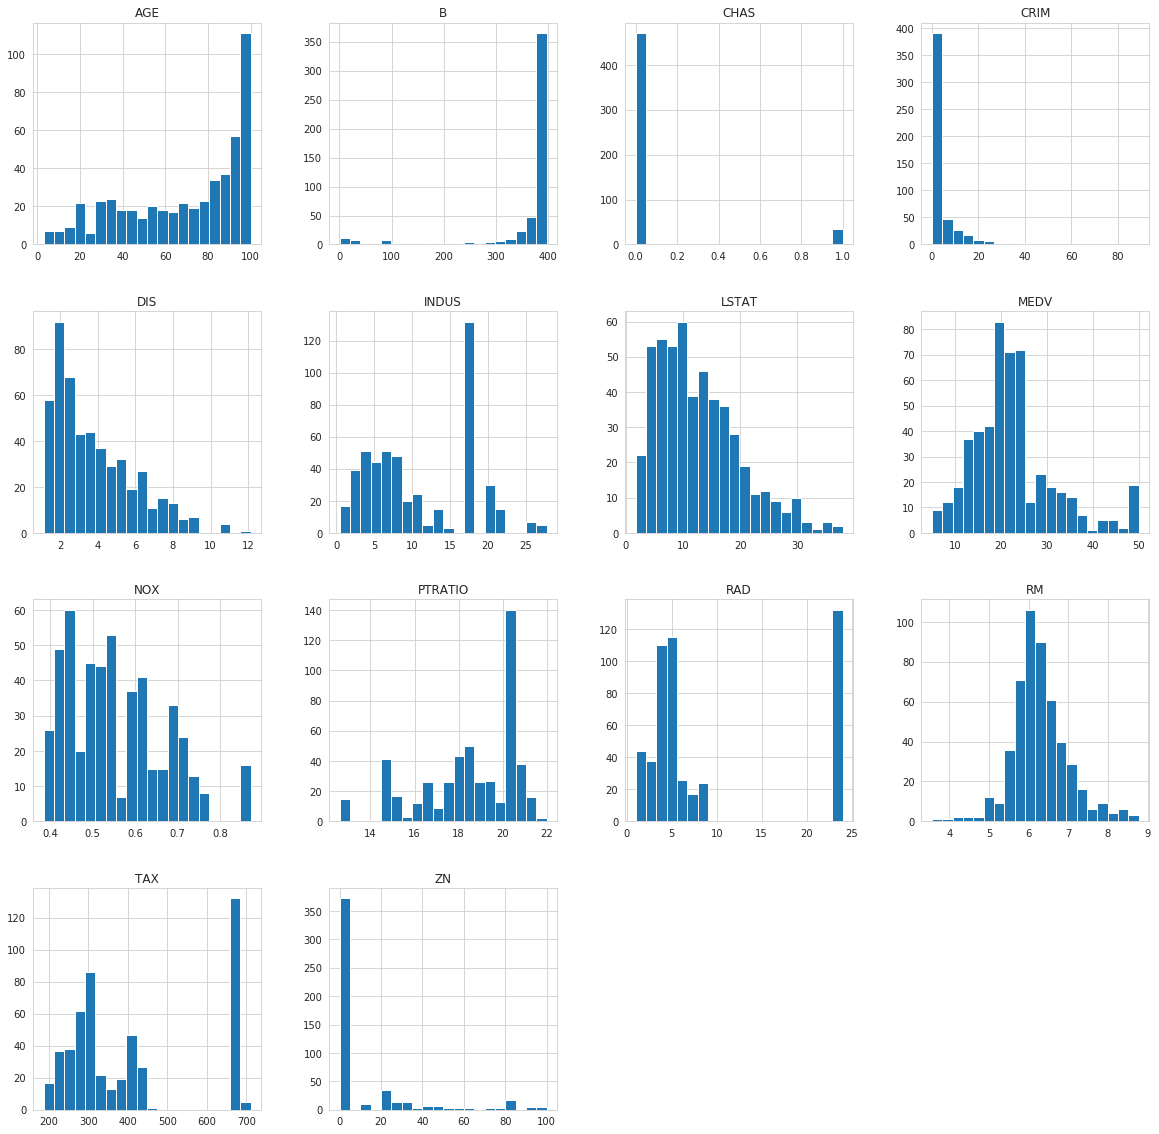

In [11]:
data.hist(bins=20, figsize=(20,20));

## Preparando conjunto de Treino e Teste

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37) 

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Classificadores (sem normalização e nem standartização)

In [38]:
classifiers = [
    md.LinearRegressionGD(),
    linear_model.SGDRegressor(),
    linear_model.LinearRegression()]

valuesRMSE1 = []

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(format(clf.predict([np.array(data.head())[0][:13]])))
    valuesRMSE1.append(metrics.rmse(y_pred, y_test))
    print(metrics.rmse(y_pred, y_test) , "\n")

[-1.6698182e+102]
1.9069325422828683e+102 

[-1.97016261e+14]
373909607505769.0 

[29.65784976]
5.887361963664284 



/home/aands/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


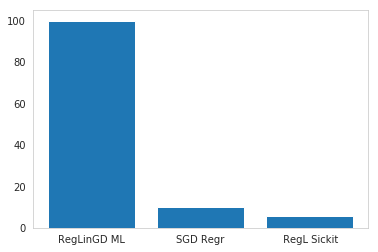

In [48]:
class_names = ['RegLinGD ML', 'SGD Regr', ' RegL Sickit']
class_ = [valuesRMSE1[0]/1.9069325422828683e+100, valuesRMSE1[1]/37390960750576, valuesRMSE1[2]]
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names);

### Normalizando e Standartizando o Dataset

In [16]:
dataN = transf.normalize(data.values)
dataS = transf.standardize(data.values)

dataNtoDataFrame = pd.DataFrame(dataN, columns=header)
dataStoDataFrame = pd.DataFrame(dataS, columns=header)

pricesN = dataNtoDataFrame['MEDV']
featuresN = dataNtoDataFrame.drop('MEDV', axis = 1)

pricesS = dataStoDataFrame['MEDV']
featuresS = dataStoDataFrame.drop('MEDV', axis = 1)

In [17]:
dataNtoDataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [18]:
dataStoDataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [19]:
XN = featuresN
yN = pricesN
XS = featuresS
yS = pricesS

In [20]:
pricesN.head()

0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
Name: MEDV, dtype: float64

In [21]:
pricesS.head()

0    0.159686
1   -0.101524
2    1.324247
3    1.182758
4    1.487503
Name: MEDV, dtype: float64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(XN, yN, test_size=0.30, random_state=27) 

In [23]:
classifiers = [
    md.LinearRegressionGD(),
    linear_model.SGDRegressor(),
    linear_model.LinearRegression(normalize = True)]

valuesRMSE2 = []

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(format(clf.predict([np.array(dataNtoDataFrame.head())[0][:13]])))
    valuesRMSE2.append(metrics.rmse(y_pred, y_test))
    print(metrics.rmse(y_pred, y_test) , "\n")

[0.48046847]
0.15227673495976465 

[0.43550151]
0.17123246444298626 

[0.55030459]
0.11352843436498403 



/home/aands/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


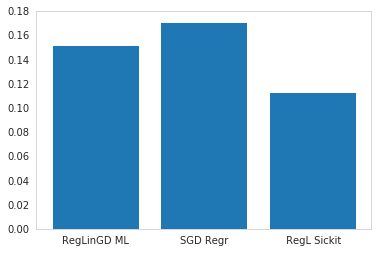

In [24]:
class_names = ['RegLinGD ML', 'SGD Regr', ' RegL Sickit']
class_ = [valuesRMSE2[0] , valuesRMSE2[1], valuesRMSE2[2]]
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names);

In [25]:
x_train, x_test, y_train, y_test = train_test_split(XS, yS, test_size=0.30, random_state=27) 

In [26]:
classifiers = [
    md.LinearRegressionGD(),
    linear_model.SGDRegressor(),
    linear_model.LinearRegression(normalize = True)]

valuesRMSE3 = []

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(format(clf.predict([np.array(dataStoDataFrame.head())[0][:13]])))
    valuesRMSE3.append(metrics.rmse(y_pred, y_test))
    print(metrics.rmse(y_pred, y_test) , "\n")

[-2.40296062]
3.9830946689246267 

[0.86781632]
0.576348906521501 

[0.78699296]
0.5560266790315176 



/home/aands/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


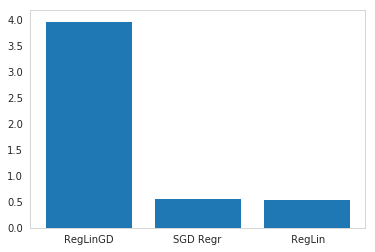

In [27]:
class_names = ['RegLinGD', 'SGD Regr', ' RegLin']
class_ = [valuesRMSE3[0] , valuesRMSE3[1], valuesRMSE3[2]]
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names);